# Scraping the pokedex

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
from IPython.display import display,HTML

In [2]:
my_url='https://pokemondb.net/pokedex/all'
my_html=requests.get(my_url)
my_soup_html=BeautifulSoup(my_html.content,'lxml')

In [3]:
count=0
for elements in my_soup_html.find_all(name='tr'):
    print(elements)
    print('\n')
    count=count+1
print('total number of table rows including header row is {}'.format(count))

<tr>
<th class="sorting" data-sort="int"><div class="sortwrap">#</div></th> <th class="sorting" data-sort="string"><div class="sortwrap">Name</div></th> <th><div class="sortwrap">Type</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Total</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">HP</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Attack</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Defense</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Sp. Atk</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Sp. Def</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Speed</div></th> </tr>


<tr>
<td class="cell-num cell-fixed" data-sort-value="1"><span class="infocard-cell-img"><span class="img-fixed icon-pkmn" data-alt="Bulbasaur icon" data-src="https://img.pokemondb.net/sprites/sun-moon/icon/bulbasaur.png"></span></span><span class="infocard-cell-data"

</tr>


<tr>
<td class="cell-num cell-fixed" data-sort-value="580"><span class="infocard-cell-img"><span class="img-fixed icon-pkmn" data-alt="Ducklett icon" data-src="https://img.pokemondb.net/sprites/sun-moon/icon/ducklett.png"></span></span><span class="infocard-cell-data">580</span></td> <td class="cell-name"><a class="ent-name" href="/pokedex/ducklett" title="View pokedex for #580 Ducklett">Ducklett</a></td><td class="cell-icon"><a class="type-icon type-water" href="/type/water">Water</a><br/> <a class="type-icon type-flying" href="/type/flying">Flying</a></td>
<td class="cell-total">305</td>
<td class="cell-num">62</td>
<td class="cell-num">44</td>
<td class="cell-num">50</td>
<td class="cell-num">44</td>
<td class="cell-num">50</td>
<td class="cell-num">55</td>
</tr>


<tr>
<td class="cell-num cell-fixed" data-sort-value="581"><span class="infocard-cell-img"><span class="img-fixed icon-pkmn" data-alt="Swanna icon" data-src="https://img.pokemondb.net/sprites/sun-moon/icon/swanna.

In [4]:
first_pokemon_row=my_soup_html.find_all(name='tr')[1]
print('html script from where the data has to be extracted is {}'.format(first_pokemon_row))

string=first_pokemon_row.find(name='td',class_='cell-name')
#print(string)
print('\n')
print("FOR BULBASAUR")
print('\n')
for a in string.find_all(name='a', href=True):
    print('link is {}'.format(a['href'])) #for link
print('name of pokemon is {}'.format(string.text)) #for name

string_2=first_pokemon_row.find(name='td',class_='cell-icon')
print('type of pokemon: {}'.format(string_2.text)) # for type

string_3=first_pokemon_row.find(name='td',class_='cell-total')
print('total power of pokemon is {}'.format(string_3.text)) # for total

append_list=[]
c=0
for number in first_pokemon_row.find_all(name='td',class_='cell-num'):  #for all other power numbers to be returned as a list
    if c==0: 
        c=c+1
        continue
    append_list.append(number.text)    
print('list that has all the power values is : {}'.format(append_list))

html script from where the data has to be extracted is <tr>
<td class="cell-num cell-fixed" data-sort-value="1"><span class="infocard-cell-img"><span class="img-fixed icon-pkmn" data-alt="Bulbasaur icon" data-src="https://img.pokemondb.net/sprites/sun-moon/icon/bulbasaur.png"></span></span><span class="infocard-cell-data">001</span></td> <td class="cell-name"><a class="ent-name" href="/pokedex/bulbasaur" title="View pokedex for #001 Bulbasaur">Bulbasaur</a></td><td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/> <a class="type-icon type-poison" href="/type/poison">Poison</a></td>
<td class="cell-total">318</td>
<td class="cell-num">45</td>
<td class="cell-num">49</td>
<td class="cell-num">49</td>
<td class="cell-num">65</td>
<td class="cell-num">65</td>
<td class="cell-num">45</td>
</tr>


FOR BULBASAUR


link is /pokedex/bulbasaur
name of pokemon is Bulbasaur
type of pokemon: Grass Poison
total power of pokemon is 318
list that has all the power val

In [5]:
#general function my_gen_func defined which takes every pokemon row as input
def my_gen_func(pokemon_row):
    append_list=[]
    c=0
    string=pokemon_row.find(name='td',class_='cell-name')
    id_number= pokemon_row.find(name='td',class_='cell-num cell-fixed').text
    print('ID number is :{}'.format(id_number))
    append_list.append(id_number)
    for a in string.find_all(name='a', href=True):
        print('link to pokemon webpage is {}'.format(a['href']))
        append_list.append(a['href'])
    print('name of pokemon is {}'.format(string.text))
    append_list.append(string.text)
    string_2=pokemon_row.find(name='td',class_='cell-icon')
    print('TYPE : {}'.format(string_2.text))
    append_list.append(string_2.text)
    string_3=pokemon_row.find(name='td',class_='cell-total')
    print('TOTAL POWER : {}'.format(string_3.text))
    append_list.append(string_3.text)
    
    for number in pokemon_row.find_all(name='td',class_='cell-num'):
        if c==0:
            c=c+1
            continue
        append_list.append(number.text)    
    print(append_list)
    append_list=np.array(append_list)
    print('\n')
    
    return append_list
    

var_count=1
var_count_2=1


for row in my_soup_html.find_all(name='tr'): #function to iterate over each pokemon row
    if (var_count==1):  #if to skip the first header column of the table
        var_count+=1
        continue
    
    catch_list=my_gen_func(row) #catch the append_list returned by my_gen_func function
    
    if var_count_2==1:  #create a dataframe here onwards
        var_count_2+=1
        my_dataframe=pd.DataFrame(catch_list) 
        my_dataframe=my_dataframe.transpose()
    else:
        catch_list=pd.DataFrame(catch_list)
        catch_list=catch_list.transpose()
        my_dataframe=my_dataframe.append(catch_list)
    
    
display(HTML(my_dataframe.to_html(index=False)))

ID number is :001
link to pokemon webpage is /pokedex/bulbasaur
name of pokemon is Bulbasaur
TYPE : Grass Poison
TOTAL POWER : 318
['001', '/pokedex/bulbasaur', 'Bulbasaur', 'Grass Poison', '318', '45', '49', '49', '65', '65', '45']


ID number is :002
link to pokemon webpage is /pokedex/ivysaur
name of pokemon is Ivysaur
TYPE : Grass Poison
TOTAL POWER : 405
['002', '/pokedex/ivysaur', 'Ivysaur', 'Grass Poison', '405', '60', '62', '63', '80', '80', '60']


ID number is :003
link to pokemon webpage is /pokedex/venusaur
name of pokemon is Venusaur
TYPE : Grass Poison
TOTAL POWER : 525
['003', '/pokedex/venusaur', 'Venusaur', 'Grass Poison', '525', '80', '82', '83', '100', '100', '80']


ID number is :003
link to pokemon webpage is /pokedex/venusaur
name of pokemon is Venusaur Mega Venusaur
TYPE : Grass Poison
TOTAL POWER : 625
['003', '/pokedex/venusaur', 'Venusaur Mega Venusaur', 'Grass Poison', '625', '80', '100', '123', '122', '120', '80']


ID number is :004
link to pokemon webpage 

link to pokemon webpage is /pokedex/koffing
name of pokemon is Koffing
TYPE : Poison 
TOTAL POWER : 340
['109', '/pokedex/koffing', 'Koffing', 'Poison ', '340', '40', '65', '95', '60', '45', '35']


ID number is :110
link to pokemon webpage is /pokedex/weezing
name of pokemon is Weezing
TYPE : Poison 
TOTAL POWER : 490
['110', '/pokedex/weezing', 'Weezing', 'Poison ', '490', '65', '90', '120', '85', '70', '60']


ID number is :111
link to pokemon webpage is /pokedex/rhyhorn
name of pokemon is Rhyhorn
TYPE : Ground Rock
TOTAL POWER : 345
['111', '/pokedex/rhyhorn', 'Rhyhorn', 'Ground Rock', '345', '80', '85', '95', '30', '30', '25']


ID number is :112
link to pokemon webpage is /pokedex/rhydon
name of pokemon is Rhydon
TYPE : Ground Rock
TOTAL POWER : 485
['112', '/pokedex/rhydon', 'Rhydon', 'Ground Rock', '485', '105', '130', '120', '45', '45', '40']


ID number is :113
link to pokemon webpage is /pokedex/chansey
name of pokemon is Chansey
TYPE : Normal 
TOTAL POWER : 450
['113', '/po

ID number is :225
link to pokemon webpage is /pokedex/delibird
name of pokemon is Delibird
TYPE : Ice Flying
TOTAL POWER : 330
['225', '/pokedex/delibird', 'Delibird', 'Ice Flying', '330', '45', '55', '45', '65', '45', '75']


ID number is :226
link to pokemon webpage is /pokedex/mantine
name of pokemon is Mantine
TYPE : Water Flying
TOTAL POWER : 485
['226', '/pokedex/mantine', 'Mantine', 'Water Flying', '485', '85', '40', '70', '80', '140', '70']


ID number is :227
link to pokemon webpage is /pokedex/skarmory
name of pokemon is Skarmory
TYPE : Steel Flying
TOTAL POWER : 465
['227', '/pokedex/skarmory', 'Skarmory', 'Steel Flying', '465', '65', '80', '140', '40', '70', '70']


ID number is :228
link to pokemon webpage is /pokedex/houndour
name of pokemon is Houndour
TYPE : Dark Fire
TOTAL POWER : 330
['228', '/pokedex/houndour', 'Houndour', 'Dark Fire', '330', '45', '60', '30', '80', '50', '65']


ID number is :229
link to pokemon webpage is /pokedex/houndoom
name of pokemon is Houndo

ID number is :335
link to pokemon webpage is /pokedex/zangoose
name of pokemon is Zangoose
TYPE : Normal 
TOTAL POWER : 458
['335', '/pokedex/zangoose', 'Zangoose', 'Normal ', '458', '73', '115', '60', '60', '60', '90']


ID number is :336
link to pokemon webpage is /pokedex/seviper
name of pokemon is Seviper
TYPE : Poison 
TOTAL POWER : 458
['336', '/pokedex/seviper', 'Seviper', 'Poison ', '458', '73', '100', '60', '100', '60', '65']


ID number is :337
link to pokemon webpage is /pokedex/lunatone
name of pokemon is Lunatone
TYPE : Rock Psychic
TOTAL POWER : 460
['337', '/pokedex/lunatone', 'Lunatone', 'Rock Psychic', '460', '90', '55', '65', '95', '85', '70']


ID number is :338
link to pokemon webpage is /pokedex/solrock
name of pokemon is Solrock
TYPE : Rock Psychic
TOTAL POWER : 460
['338', '/pokedex/solrock', 'Solrock', 'Rock Psychic', '460', '90', '95', '85', '55', '65', '70']


ID number is :339
link to pokemon webpage is /pokedex/barboach
name of pokemon is Barboach
TYPE : Wat

TOTAL POWER : 348
['425', '/pokedex/drifloon', 'Drifloon', 'Ghost Flying', '348', '90', '50', '34', '60', '44', '70']


ID number is :426
link to pokemon webpage is /pokedex/drifblim
name of pokemon is Drifblim
TYPE : Ghost Flying
TOTAL POWER : 498
['426', '/pokedex/drifblim', 'Drifblim', 'Ghost Flying', '498', '150', '80', '44', '90', '54', '80']


ID number is :427
link to pokemon webpage is /pokedex/buneary
name of pokemon is Buneary
TYPE : Normal 
TOTAL POWER : 350
['427', '/pokedex/buneary', 'Buneary', 'Normal ', '350', '55', '66', '44', '44', '56', '85']


ID number is :428
link to pokemon webpage is /pokedex/lopunny
name of pokemon is Lopunny
TYPE : Normal 
TOTAL POWER : 480
['428', '/pokedex/lopunny', 'Lopunny', 'Normal ', '480', '65', '76', '84', '54', '96', '105']


ID number is :428
link to pokemon webpage is /pokedex/lopunny
name of pokemon is Lopunny Mega Lopunny
TYPE : Normal Fighting
TOTAL POWER : 580
['428', '/pokedex/lopunny', 'Lopunny Mega Lopunny', 'Normal Fighting',

ID number is :532
link to pokemon webpage is /pokedex/timburr
name of pokemon is Timburr
TYPE : Fighting 
TOTAL POWER : 305
['532', '/pokedex/timburr', 'Timburr', 'Fighting ', '305', '75', '80', '55', '25', '35', '35']


ID number is :533
link to pokemon webpage is /pokedex/gurdurr
name of pokemon is Gurdurr
TYPE : Fighting 
TOTAL POWER : 405
['533', '/pokedex/gurdurr', 'Gurdurr', 'Fighting ', '405', '85', '105', '85', '40', '50', '40']


ID number is :534
link to pokemon webpage is /pokedex/conkeldurr
name of pokemon is Conkeldurr
TYPE : Fighting 
TOTAL POWER : 505
['534', '/pokedex/conkeldurr', 'Conkeldurr', 'Fighting ', '505', '105', '140', '95', '55', '65', '45']


ID number is :535
link to pokemon webpage is /pokedex/tympole
name of pokemon is Tympole
TYPE : Water 
TOTAL POWER : 294
['535', '/pokedex/tympole', 'Tympole', 'Water ', '294', '50', '50', '40', '50', '40', '64']


ID number is :536
link to pokemon webpage is /pokedex/palpitoad
name of pokemon is Palpitoad
TYPE : Water G



ID number is :645
link to pokemon webpage is /pokedex/landorus
name of pokemon is Landorus Therian Forme
TYPE : Ground Flying
TOTAL POWER : 600
['645', '/pokedex/landorus', 'Landorus Therian Forme', 'Ground Flying', '600', '89', '145', '90', '105', '80', '91']


ID number is :646
link to pokemon webpage is /pokedex/kyurem
name of pokemon is Kyurem
TYPE : Dragon Ice
TOTAL POWER : 660
['646', '/pokedex/kyurem', 'Kyurem', 'Dragon Ice', '660', '125', '130', '90', '130', '90', '95']


ID number is :646
link to pokemon webpage is /pokedex/kyurem
name of pokemon is Kyurem Black Kyurem
TYPE : Dragon Ice
TOTAL POWER : 700
['646', '/pokedex/kyurem', 'Kyurem Black Kyurem', 'Dragon Ice', '700', '125', '170', '100', '120', '90', '95']


ID number is :646
link to pokemon webpage is /pokedex/kyurem
name of pokemon is Kyurem White Kyurem
TYPE : Dragon Ice
TOTAL POWER : 700
['646', '/pokedex/kyurem', 'Kyurem White Kyurem', 'Dragon Ice', '700', '125', '120', '90', '170', '100', '95']


ID number is :6

ID number is :733
link to pokemon webpage is /pokedex/toucannon
name of pokemon is Toucannon
TYPE : Normal Flying
TOTAL POWER : 485
['733', '/pokedex/toucannon', 'Toucannon', 'Normal Flying', '485', '80', '120', '75', '75', '75', '60']


ID number is :734
link to pokemon webpage is /pokedex/yungoos
name of pokemon is Yungoos
TYPE : Normal 
TOTAL POWER : 253
['734', '/pokedex/yungoos', 'Yungoos', 'Normal ', '253', '48', '70', '30', '30', '30', '45']


ID number is :735
link to pokemon webpage is /pokedex/gumshoos
name of pokemon is Gumshoos
TYPE : Normal 
TOTAL POWER : 418
['735', '/pokedex/gumshoos', 'Gumshoos', 'Normal ', '418', '88', '110', '60', '55', '60', '45']


ID number is :736
link to pokemon webpage is /pokedex/grubbin
name of pokemon is Grubbin
TYPE : Bug 
TOTAL POWER : 300
['736', '/pokedex/grubbin', 'Grubbin', 'Bug ', '300', '47', '62', '45', '55', '45', '46']


ID number is :737
link to pokemon webpage is /pokedex/charjabug
name of pokemon is Charjabug
TYPE : Bug Electric

0,1,2,3,4,5,6,7,8,9,10
001,/pokedex/bulbasaur,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
002,/pokedex/ivysaur,Ivysaur,Grass Poison,405,60,62,63,80,80,60
003,/pokedex/venusaur,Venusaur,Grass Poison,525,80,82,83,100,100,80
003,/pokedex/venusaur,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
004,/pokedex/charmander,Charmander,Fire,309,39,52,43,60,50,65
005,/pokedex/charmeleon,Charmeleon,Fire,405,58,64,58,80,65,80
006,/pokedex/charizard,Charizard,Fire Flying,534,78,84,78,109,85,100
006,/pokedex/charizard,Charizard Mega Charizard X,Fire Dragon,634,78,130,111,130,85,100
006,/pokedex/charizard,Charizard Mega Charizard Y,Fire Flying,634,78,104,78,159,115,100
007,/pokedex/squirtle,Squirtle,Water,314,44,48,65,50,64,43


# cleaning the pokedex

In [6]:
my_dataframe.rename(columns={0:'ID_number'},inplace=True)

In [7]:
my_df1=my_dataframe # just so that the dataframe created up till this point stays safe and my_df1 is an exact replica of my_dataframe 
#print(my_dataframe)
#my_df.drop(columns='link')
#my_df.rename(columns={'link':'links'})
my_df1.rename(columns={1:'links'},inplace=True)
my_df1.rename(columns={2:'name'},inplace=True)
my_df1.rename(columns={3:'type'},inplace=True)
my_df1.rename(columns={4:'total_power'},inplace=True)
my_df1.rename(columns={5:'HP'},inplace=True)
my_df1.rename(columns={6:'Attack'},inplace=True)
my_df1.rename(columns={7:'Defense'},inplace=True)
my_df1.rename(columns={8:'spl atk'},inplace=True)
my_df1.rename(columns={9:'spl def'},inplace=True)
my_df1.rename(columns={10:'speed'},inplace=True)
display(HTML(my_df1.to_html(index=False)))

ID_number,links,name,type,total_power,HP,Attack,Defense,spl atk,spl def,speed
001,/pokedex/bulbasaur,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
002,/pokedex/ivysaur,Ivysaur,Grass Poison,405,60,62,63,80,80,60
003,/pokedex/venusaur,Venusaur,Grass Poison,525,80,82,83,100,100,80
003,/pokedex/venusaur,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
004,/pokedex/charmander,Charmander,Fire,309,39,52,43,60,50,65
005,/pokedex/charmeleon,Charmeleon,Fire,405,58,64,58,80,65,80
006,/pokedex/charizard,Charizard,Fire Flying,534,78,84,78,109,85,100
006,/pokedex/charizard,Charizard Mega Charizard X,Fire Dragon,634,78,130,111,130,85,100
006,/pokedex/charizard,Charizard Mega Charizard Y,Fire Flying,634,78,104,78,159,115,100
007,/pokedex/squirtle,Squirtle,Water,314,44,48,65,50,64,43


In [8]:
my_df1.dtypes

ID_number      object
links          object
name           object
type           object
total_power    object
HP             object
Attack         object
Defense        object
spl atk        object
spl def        object
speed          object
dtype: object

In [9]:
#converting into numeric when inappropriate
my_df1['ID_number'] = pd.to_numeric(my_df1['ID_number'], errors='coerce')
my_df1['total_power'] = pd.to_numeric(my_df1['total_power'], errors='coerce')
my_df1['HP'] = pd.to_numeric(my_df1['HP'], errors='coerce')
my_df1['Attack'] = pd.to_numeric(my_df1['Attack'], errors='coerce')
my_df1['Defense'] = pd.to_numeric(my_df1['Defense'], errors='coerce')
my_df1['spl atk'] = pd.to_numeric(my_df1['spl atk'], errors='coerce')
my_df1['spl def'] = pd.to_numeric(my_df1['spl def'], errors='coerce')
my_df1['speed'] = pd.to_numeric(my_df1['speed'], errors='coerce')

In [10]:
my_df1.dtypes

ID_number       int64
links          object
name           object
type           object
total_power     int64
HP              int64
Attack          int64
Defense         int64
spl atk         int64
spl def         int64
speed           int64
dtype: object

In [12]:
#created dummy variables depending on individual distinct values contained in the column type of dataframe
#below display are the 18 dummy variable columns
display(HTML(my_df1['type'].str.get_dummies(' ').to_html(index=False)))

Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
deduplicate=my_df1.drop_duplicates(subset='links')
display(HTML(deduplicate.to_html(index=False))) 

ID_number,links,name,type,total_power,HP,Attack,Defense,spl atk,spl def,speed
1,/pokedex/bulbasaur,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
2,/pokedex/ivysaur,Ivysaur,Grass Poison,405,60,62,63,80,80,60
3,/pokedex/venusaur,Venusaur,Grass Poison,525,80,82,83,100,100,80
4,/pokedex/charmander,Charmander,Fire,309,39,52,43,60,50,65
5,/pokedex/charmeleon,Charmeleon,Fire,405,58,64,58,80,65,80
6,/pokedex/charizard,Charizard,Fire Flying,534,78,84,78,109,85,100
7,/pokedex/squirtle,Squirtle,Water,314,44,48,65,50,64,43
8,/pokedex/wartortle,Wartortle,Water,405,59,63,80,65,80,58
9,/pokedex/blastoise,Blastoise,Water,530,79,83,100,85,105,78
10,/pokedex/caterpie,Caterpie,Bug,195,45,30,35,20,20,45


In [14]:
len(deduplicate['ID_number'])

809

In [15]:
#temp_sample=deduplicate[deduplicate['ID_number']%4 == 0]
#temp_sample['links']  
#display(HTML(temp_sample.to_html(index=False))) 
deduplicate['sample']=np.where(deduplicate['ID_number']%4 == 0, '1', '0') #tag every 4th pokemon with 1 in dummy variable sample column
dedupe=deduplicate[deduplicate['sample']=='1']
dedupe=dedupe[:-1] #to delete the last row from the sample
display(HTML(dedupe.to_html(index=False)))

/Users/vats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


ID_number,links,name,type,total_power,HP,Attack,Defense,spl atk,spl def,speed,sample
4,/pokedex/charmander,Charmander,Fire,309,39,52,43,60,50,65,1
8,/pokedex/wartortle,Wartortle,Water,405,59,63,80,65,80,58,1
12,/pokedex/butterfree,Butterfree,Bug Flying,395,60,45,50,90,80,70,1
16,/pokedex/pidgey,Pidgey,Normal Flying,251,40,45,40,35,35,56,1
20,/pokedex/raticate,Raticate,Normal,413,55,81,60,50,70,97,1
24,/pokedex/arbok,Arbok,Poison,448,60,95,69,65,79,80,1
28,/pokedex/sandslash,Sandslash,Ground,450,75,100,110,45,55,65,1
32,/pokedex/nidoran-m,Nidoran♂,Poison,273,46,57,40,40,40,50,1
36,/pokedex/clefable,Clefable,Fairy,483,95,70,73,95,90,60,1
40,/pokedex/wigglytuff,Wigglytuff,Normal Fairy,435,140,70,45,85,50,45,1


# scraping individual pages

In [17]:
bulb_url='https://pokemondb.net/pokedex/bulbasaur'
bulb_html=requests.get(bulb_url)
bulb_soup_html=BeautifulSoup(bulb_html.text,'html.parser')
div_html=bulb_soup_html.find_all(name='img')
req_img=div_html[0]
img_url=req_img['src']

image url is : https://img.pokemondb.net/artwork/bulbasaur.jpg


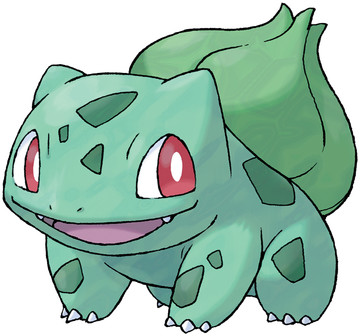

In [18]:
import IPython.display as disp
print('image url is : {}'.format(img_url))
disp.Image(requests.get(img_url).content)

In [19]:
tables = pd.read_html(requests.get(bulb_url, headers={'User-agent': 'Mozilla/5.0'}).text)

In [20]:
#required location table is at second to last position in this bulbasaur case as we can see from the  outpiut below
count_tab=0
for table in tables:
    count_tab+=1
    if count_tab>10:
        print(table)
        print('\n') 

    TR          Move     Type  Cat. Power Acc.
0    0  Swords Dance   Normal   NaN     —    —
1    1     Body Slam   Normal   NaN    85  100
2   17       Amnesia  Psychic   NaN     —    —
3   20    Substitute   Normal   NaN     —    —
4   22   Sludge Bomb   Poison   NaN    90  100
5   26        Endure   Normal   NaN     —    —
6   27    Sleep Talk   Normal   NaN     —    —
7   59     Seed Bomb    Grass   NaN    80  100
8   65   Energy Ball    Grass   NaN    90  100
9   71    Leaf Storm    Grass   NaN   130   90
10  72    Power Whip    Grass   NaN   120   85
11  77    Grass Knot    Grass   NaN     —  100
12  85       Work Up   Normal   NaN     —    —


   Lv.           Move    Type  Cat. Power Acc.
0    1          Growl  Normal   NaN     —  100
1    1         Tackle  Normal   NaN    40  100
2    5      Vine Whip   Grass   NaN    45  100
3    9     Leech Seed   Grass   NaN     —   90
4   14  Poison Powder  Poison   NaN     —   75
5   14   Sleep Powder   Grass   NaN     —   75
6   18     

In [21]:
#required location table
bulbizarre=pd.DataFrame(tables[-2])
display(HTML(bulbizarre.to_html(index=False)))

0,1
RedBlue,Pallet Town
Yellow,Cerulean City
GoldSilverCrystal,Trade/migrate from another game
RubySapphire,Trade/migrate from another game
FireRedLeafGreen,Pallet Town
Emerald,Trade/migrate from another game
DiamondPearlPlatinum,Trade/migrate from another game
HeartGoldSoulSilver,Pallet Town
BlackWhiteBlack 2White 2,Trade/migrate from another game
XY,Lumiose City


In [22]:
#transpose the location table
bulbizarre_t=bulbizarre.transpose()
bulbizarre_t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,RedBlue,Yellow,GoldSilverCrystal,RubySapphire,FireRedLeafGreen,Emerald,DiamondPearlPlatinum,HeartGoldSoulSilver,BlackWhiteBlack 2White 2,XY,Omega RubyAlpha Sapphire,SunMoon,Ultra SunUltra Moon,Let's Go PikachuLet's Go Eevee,SwordShield
1,Pallet Town,Cerulean City,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Trade/migrate from another game,Lumiose City,Trade/migrate from another game,Trade/migrate from another game,Route 2,"Cerulean City, Viridian Forest",Location data not yet available


In [23]:
#following code is for changing column names to the first row elements
for i in range(0,20):
    if i in bulbizarre_t.columns:
        bulbizarre_t.rename(columns={i:bulbizarre_t[i][0]},inplace=True)
    else:
        break       

bulbizarre_tt=bulbizarre_t.iloc[1:]
display(HTML(bulbizarre_tt.to_html(index=False)))

#list_name_xy is for storing the url of pokemon and content of XY column if it exists.
list_name_xy=[]
if 'XY' in bulbizarre_tt.columns:
    list_name_xy.append(bulb_url)
    list_name_xy.append(bulbizarre_tt['XY'][1])
print_df=pd.DataFrame(list_name_xy)
print_df.transpose()

RedBlue,Yellow,GoldSilverCrystal,RubySapphire,FireRedLeafGreen,Emerald,DiamondPearlPlatinum,HeartGoldSoulSilver,BlackWhiteBlack 2White 2,XY,Omega RubyAlpha Sapphire,SunMoon,Ultra SunUltra Moon,Let's Go PikachuLet's Go Eevee,SwordShield
Pallet Town,Cerulean City,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Trade/migrate from another game,Lumiose City,Trade/migrate from another game,Trade/migrate from another game,Route 2,"Cerulean City, Viridian Forest",Location data not yet available


,0,1
0,https://pokemondb.net/pokedex/bulbasaur,Lumiose City


In [24]:
import time 
final_list=[] # this is a list of lists wherein each element will be a list of url and content of XY column.

for links in dedupe['links']: #for every link from the sample named dedupe
    url='https://pokemondb.net' + links
    tables = pd.read_html(requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text)
    bulbizarre=pd.DataFrame(tables[-2])
    #display(HTML(bulbizarre.to_html(index=False)))
    bulbizarre_t=bulbizarre.transpose()
    for i in range(0,20):
        if i in bulbizarre_t.columns:
            bulbizarre_t.rename(columns={i:bulbizarre_t[i][0]},inplace=True)
        else:
            break
    bulbizarre_tt=bulbizarre_t.iloc[1:]
    #display(HTML(bulbizarre_tt.to_html(index=False)))
    list_name_xy=[] #this forms each element appended to the final_list initialized above
    if 'XY' in bulbizarre_tt.columns:
        list_name_xy.append(url)
        list_name_xy.append(bulbizarre_tt['XY'][1])
    else :
        continue
    print_df=pd.DataFrame(list_name_xy)
    display(HTML(print_df.transpose().to_html(index=False)))
    final_list.append(list_name_xy)
    time.sleep(0.1)

0,1
https://pokemondb.net/pokedex/charmander,Lumiose City


0,1
https://pokemondb.net/pokedex/wartortle,Evolve Squirtle


0,1
https://pokemondb.net/pokedex/butterfree,Evolve Caterpie/Metapod


0,1
https://pokemondb.net/pokedex/pidgey,"Route 2, 3"


0,1
https://pokemondb.net/pokedex/raticate,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/arbok,Route 19


0,1
https://pokemondb.net/pokedex/sandslash,"Route 18, Terminus Cave"


0,1
https://pokemondb.net/pokedex/nidoran-m,Route 11


0,1
https://pokemondb.net/pokedex/clefable,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/gloom,Evolve Oddish


0,1
https://pokemondb.net/pokedex/venonat,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/meowth,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/mankey,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/poliwag,"Route 14, 15, 16, 19, 21, Laverre City, Frost ..."


0,1
https://pokemondb.net/pokedex/tentacool,"Route 8, 12, Cyllage City, Ambrette Town, Shal..."


0,1
https://pokemondb.net/pokedex/doduo,Route 5


0,1
https://pokemondb.net/pokedex/grimer,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/gastly,Breed Haunter/Gengar


0,1
https://pokemondb.net/pokedex/drowzee,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/voltorb,Breed Electrode


0,1
https://pokemondb.net/pokedex/cubone,Glittering Cave


0,1
https://pokemondb.net/pokedex/lickitung,Victory Road


0,1
https://pokemondb.net/pokedex/horsea,"Cyllage City, Ambrette Town"


0,1
https://pokemondb.net/pokedex/jynx,Frost Cavern


0,1
https://pokemondb.net/pokedex/tauros,Route 12


0,1
https://pokemondb.net/pokedex/ditto,Pokémon Village


0,1
https://pokemondb.net/pokedex/kabuto,Ambrette Town


0,1
https://pokemondb.net/pokedex/articuno,"Sea Spirit's Den, Roaming Kalos"


0,1
https://pokemondb.net/pokedex/dragonair,Route 21


0,1
https://pokemondb.net/pokedex/chikorita,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/quilava,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/feraligatr,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/noctowl,"Route 20, Pokémon Village"


0,1
https://pokemondb.net/pokedex/ariados,"Terminus Cave, Victory Road"


0,1
https://pokemondb.net/pokedex/flaaffy,Evolve Mareep


0,1
https://pokemondb.net/pokedex/azumarill,Route 22


0,1
https://pokemondb.net/pokedex/skiploom,Evolve Hoppip


0,1
https://pokemondb.net/pokedex/sunflora,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/misdreavus,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/pineco,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/steelix,Cyllage City


0,1
https://pokemondb.net/pokedex/scizor,Evolve Scyther


0,1
https://pokemondb.net/pokedex/teddiursa,Breed Ursaring


0,1
https://pokemondb.net/pokedex/swinub,Breed Piloswine/Mamoswine


0,1
https://pokemondb.net/pokedex/octillery,"Route 12, Shalour City, Azure Bay"


0,1
https://pokemondb.net/pokedex/donphan,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/tyrogue,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/magby,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/treecko,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/combusken,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/swampert,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/linoone,Evolve Zigzagoon


0,1
https://pokemondb.net/pokedex/cascoon,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/ludicolo,Evolve Lotad/Lombre


0,1
https://pokemondb.net/pokedex/taillow,Route 8


0,1
https://pokemondb.net/pokedex/ralts,"Route 4, Lumiose City"


0,1
https://pokemondb.net/pokedex/masquerain,Route 3


0,1
https://pokemondb.net/pokedex/vigoroth,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/makuhita,Breed Hariyama


0,1
https://pokemondb.net/pokedex/skitty,Route 4


0,1
https://pokemondb.net/pokedex/medicham,Evolve Meditite


0,1
https://pokemondb.net/pokedex/minun,Route 5


0,1
https://pokemondb.net/pokedex/gulpin,Route 5


0,1
https://pokemondb.net/pokedex/wailmer,"Route 8, Cyllage City, Ambrette Town"


0,1
https://pokemondb.net/pokedex/torkoal,Route 18


0,1
https://pokemondb.net/pokedex/trapinch,Route 13


0,1
https://pokemondb.net/pokedex/cacturne,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/seviper,Route 8


0,1
https://pokemondb.net/pokedex/whiscash,"Route 14, 19"


0,1
https://pokemondb.net/pokedex/claydol,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/kecleon,Route 6


0,1
https://pokemondb.net/pokedex/dusclops,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/sealeo,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/metagross,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/latias,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/rayquaza,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/grotle,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/infernape,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/starly,Route 11


0,1
https://pokemondb.net/pokedex/bibarel,Route 22


0,1
https://pokemondb.net/pokedex/luxio,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/cranidos,Ambrette Town


0,1
https://pokemondb.net/pokedex/burmy,"Route 3, 7"


0,1
https://pokemondb.net/pokedex/vespiquen,Evolve Combee


0,1
https://pokemondb.net/pokedex/cherubi,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/ambipom,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/lopunny,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/purugly,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/bronzor,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/happiny,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/lucario,Tower of Mastery


0,1
https://pokemondb.net/pokedex/drapion,Route 19


0,1
https://pokemondb.net/pokedex/finneon,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/abomasnow,Route 17


0,1
https://pokemondb.net/pokedex/gliscor,Evolve Gligar


0,1
https://pokemondb.net/pokedex/cresselia,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/servine,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/emboar,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/patrat,Breed Watchog


0,1
https://pokemondb.net/pokedex/stoutland,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/simisage,Evolve Pansage


0,1
https://pokemondb.net/pokedex/simipour,Evolve Panpour


0,1
https://pokemondb.net/pokedex/tranquill,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/roggenrola,Reflection Cave


0,1
https://pokemondb.net/pokedex/swoobat,Evolve Woobat


0,1
https://pokemondb.net/pokedex/timburr,Breed Gurdurr/Conkeldurr


0,1
https://pokemondb.net/pokedex/palpitoad,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/sewaddle,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/whirlipede,Evolve Venipede


0,1
https://pokemondb.net/pokedex/petilil,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/maractus,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/tirtouga,Ambrette Town


0,1
https://pokemondb.net/pokedex/trubbish,Lost Hotel


0,1
https://pokemondb.net/pokedex/minccino,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/ducklett,Route 7


0,1
https://pokemondb.net/pokedex/vanilluxe,Evolve Vanillite/Vanillish


0,1
https://pokemondb.net/pokedex/karrablast,"Route 14, 19"


0,1
https://pokemondb.net/pokedex/frillish,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/galvantula,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/klang,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/eelektross,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/lampent,Evolve Litwick


0,1
https://pokemondb.net/pokedex/shelmet,"Route 14, 19"


0,1
https://pokemondb.net/pokedex/mienshao,Evolve Mienfoo


0,1
https://pokemondb.net/pokedex/pawniard,"Route 15, Lost Hotel"


0,1
https://pokemondb.net/pokedex/braviary,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/durant,"Route 18, Terminus Cave"


0,1
https://pokemondb.net/pokedex/larvesta,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/virizion,Trade/migrate from another game


0,1
https://pokemondb.net/pokedex/chesnaught,Evolve Chespin/Quilladin


0,1
https://pokemondb.net/pokedex/froakie,"Vaniville Town, Aquacorde Town"


0,1
https://pokemondb.net/pokedex/diggersby,Route 22


0,1
https://pokemondb.net/pokedex/scatterbug,"Route 2, Santalune Forest"


0,1
https://pokemondb.net/pokedex/pyroar,Evolve Litleo


0,1
https://pokemondb.net/pokedex/skiddo,Route 5


0,1
https://pokemondb.net/pokedex/furfrou,Route 5


0,1
https://pokemondb.net/pokedex/doublade,Evolve Honedge


0,1
https://pokemondb.net/pokedex/tyrunt,Ambrette Town


0,1
https://pokemondb.net/pokedex/goomy,Route 14


0,1
https://pokemondb.net/pokedex/phantump,Route 16


0,1
https://pokemondb.net/pokedex/bergmite,Frost Cavern


In [25]:
url_loc_table=pd.DataFrame(final_list)
url_loc_table1=url_loc_table
url_loc_table1.rename(columns={0:'URL'},inplace=True)
url_loc_table1.rename(columns={1:'Location'},inplace=True)
url_loc_table1

,URL,Location
0,https://pokemondb.net/pokedex/charmander,Lumiose City
1,https://pokemondb.net/pokedex/wartortle,Evolve Squirtle
2,https://pokemondb.net/pokedex/butterfree,Evolve Caterpie/Metapod
3,https://pokemondb.net/pokedex/pidgey,"Route 2, 3"
4,https://pokemondb.net/pokedex/raticate,Trade/migrate from another game
5,https://pokemondb.net/pokedex/arbok,Route 19
6,https://pokemondb.net/pokedex/sandslash,"Route 18, Terminus Cave"
7,https://pokemondb.net/pokedex/nidoran-m,Route 11
8,https://pokemondb.net/pokedex/clefable,Trade/migrate from another game
9,https://pokemondb.net/pokedex/gloom,Evolve Oddish


# Analysis

In [26]:
type_list=[]
finale_list=[]
for types in dedupe['type']:
    def_atk_list=[]
    if types in type_list:
        continue
    else:
        deduce=dedupe[dedupe['type']== types ]
        avg_def=deduce['Defense'].mean()
        avg_atk=deduce['Attack'].mean()
        def_atk_list.append(types)
        def_atk_list.append(avg_def)
        def_atk_list.append(avg_atk)
        finale_list.append(def_atk_list)
    type_list.append(types)

In [27]:
avg_df=pd.DataFrame(finale_list)
avg_df.rename(columns={0:'type'},inplace=True)
avg_df.rename(columns={1:'avg_defense'},inplace=True)
avg_df.rename(columns={2:'avg_attack'},inplace=True)
max_def = avg_df['avg_defense'].max()
min_def = avg_df['avg_defense'].min()
max_atk = avg_df['avg_attack'].max()
min_atk = avg_df['avg_attack'].min()
print('max avg defense:')
print(avg_df[avg_df['avg_defense']==max_def])
print('\n')
print('min avg defense:')
print(avg_df[avg_df['avg_defense']==min_def])
print('\n')
print('max avg attack:')
print(avg_df[avg_df['avg_attack']==max_atk])
print('\n')
print('min avg attack:')
print(avg_df[avg_df['avg_attack']==min_atk])

max avg defense:
            type  avg_defense  avg_attack
29  Steel Ground        200.0        85.0


min avg defense:
             type  avg_defense  avg_attack
37  Psychic Fairy         25.0        25.0


max avg attack:
               type  avg_defense  avg_attack
47    Dragon Flying         90.0       150.0
71  Dragon Electric        120.0       150.0


min avg attack:
             type  avg_defense  avg_attack
37  Psychic Fairy         25.0        25.0


# END